# Tema 2: Introducción a scikit_learn

Vamos a mostrar aquí como  cargar un conjunto de datos que ya existe en scikit_learn, y cómo aplicarle un clasificador (knn en este caso), y evaluando el rendimiento. 

In [35]:
%matplotlib inline
import numpy as np


## Carga de datos: iris

Para nuestros ejemplos, usremos el conjunto de datos de la flor de iris, disponible en scikit-learn como uno de los conjuntos predefinidos de la biblioteca

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris=load_iris()

Podemos consultar una serie de atributos de los conjuntos de datos, que contienen toda la información sobre los mismos (incluyendo los propios datos, que se almacenan como arrays numpy)

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
iris.data.shape

(150, 4)

In [40]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Cargamos los datos en variables X_iris, y_iris

In [43]:
X_iris, y_iris = iris.data, iris.target
X_names, y_names = iris.feature_names, iris.target_names


## Visualización de los datos 

Usaremos pyplot de matplotlib para la tareas de visualización de los datos o de cualquier gráfico 2D

In [44]:
from matplotlib import pyplot as plt

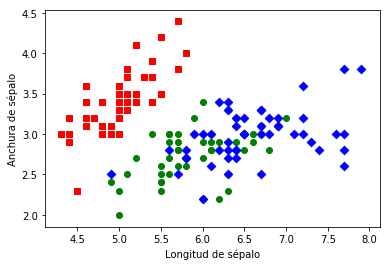

In [45]:
for tipo,marca,color in zip(range(len(y_names)),"soD","rgb"):
  plt.scatter(X_iris[:,0][y_iris == tipo],
              X_iris[:,1][y_iris == tipo],
              marker=marca,c=color)
plt.xlabel("Longitud de sépalo")
plt.ylabel("Anchura de sépalo")
plt.show()

O de manera más general para representar cualquier par de coordenadas:

In [46]:
def representacion_grafica(datos,caracteristicas,
                           objetivo,clases,c1,c2):
  for tipo,marca,color in zip(range(len(clases)),"soD","rgb"):
    plt.scatter(datos[objetivo == tipo,c1],
                datos[objetivo == tipo,c2],
                marker=marca,c=color)
  plt.xlabel(caracteristicas[c1])
  plt.ylabel(caracteristicas[c2])
  plt.legend(clases)
  plt.show()



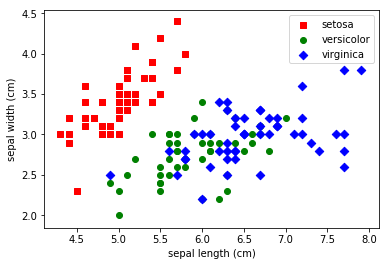

In [47]:
representacion_grafica(X_iris,X_names,y_iris,y_names,0,1)

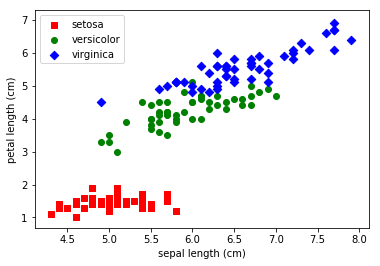

In [48]:
representacion_grafica(X_iris,X_names,y_iris,y_names,0,2)

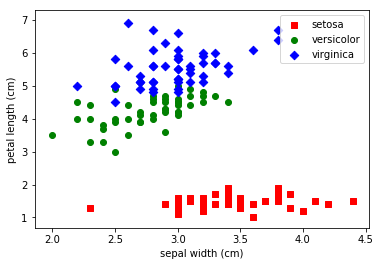

In [49]:
representacion_grafica(X_iris,X_names,y_iris,y_names,1,2)


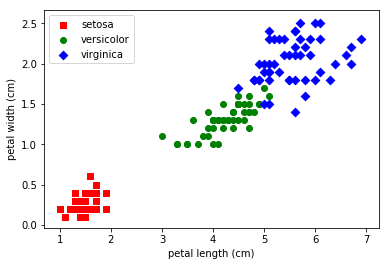

In [50]:
representacion_grafica(iris.data,X_names,y_iris,y_names,2,3)

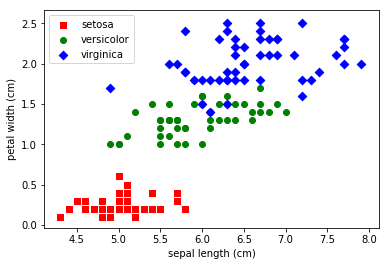

In [51]:
representacion_grafica(iris.data,X_names,y_iris,y_names,0,3)

## Separación de los datos

Podemos separar el total de datos en varios conjuntos, para entrenar, validar y/o evaluar los modelos (en este caso 75%-25%)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_iris,y_iris,test_size = 0.25)

## Normalización de los datos

Frecuentemente no todas las características son de la misma magnitud, lo que puede interferir en la precisión de los modelos aprendidos. En scikit-learn podemos normalizar los datos   

Un normalizador que se usa con frencuancia es el normalizador estándar, que ajusta cada caractarística para que su media sea cero y su desviación típica 1. Aquí ya se puede ver un primer uso de los métodos fit y transform, omnipresentes en todos los modelos.

En un normalizador, el método fit, simplemente "aprende" (calcula) los parámetros de la normalización (en este caso, las medias y desviaciones típicas de cada característica):

In [53]:
from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler().fit(X_train)

Podemos incluo acceder a los parámetros que se han "aprendido" tras hacer fit, ya que quedan guardado en un par de atributos del objeto normalizador:

In [54]:
print(normalizador.mean_)
print(normalizador.scale_)

[ 5.83303571  3.04375     3.77053571  1.20982143]
[ 0.82596139  0.43666374  1.75324385  0.75486042]


Ahora podemos aplicar el método transform para normalizar cualquier conjunto de datos, usnado los parámetros calculados:

In [55]:
Xn_train = normalizador.transform(X_train)

Comprobación:

In [56]:
print(np.mean(Xn_train,axis=0))
print(np.std(Xn_train,axis=0))

[  4.91174561e-16   3.62805024e-15   2.08166817e-16  -3.61318118e-16]
[ 1.  1.  1.  1.]


## Clasificador Knn

Nuestro primer ejemplo de clasificador en scikit-learn, en este caso el clasificador knn. Como todos los clasificadores, una vez creados con el constructor, tenemos los métodos fit (para entrenar o aprender) y predict  (para hacer predicciones una vez que se ha aprendido el modelo.

Creación del clasificador:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

Lo entrenamos, con los datos normalizados. Obsérvese cómo el resultado de entrenar es el propio clasificador:

In [58]:
knn.fit(Xn_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Vamos ahora a hacer predicciones sobre el conjunto de test, y comprobamos la predicción con la clase que sabemos que tiene. Pero para ello, tenemos que aplicar la predicción sobre el conjunto normalizado con el mismo normalizador que se usó para transformar el conjunto de entrenamiento:

In [59]:
Xn_test = normalizador.transform(X_test)
knn.predict(Xn_test)

array([1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1])

Las clases reales son las siguientes:

In [60]:
y_test

array([1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1])

Como se observa, la predicción ha sido perfecta (lo cual no es frecuente). El método score del clasificador (que calcula el porcentaje de ejemplos cuya predicción es la correcta), nos lo confirma:

In [61]:
knn.score(Xn_test,y_test)

0.97368421052631582

## Más detalles en Knn

Vemos ahora a ver algunos ejempos del comportamientos de Knn, explorando más las características del clasificador.

Los ejemplos y la discusión que siguen están principalmente tomada tomada del tema 2 del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python). 

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

Vamos a usar el módulo `mglearn`, que aparece como material del libro.

Para que la importación siguiente funcione, la carpeta `mglearn` que viene en los materiales, debe ser copiada en cualquier carpeta que python busque para cambiar los módulos.  

In [62]:
import mglearn

Para ilustrar el comportamiento de Knn, usaremos un conjunto de datos bidimensional llamado `forge`. Carguemos los datos y representémoslos:

X.shape: (26, 2)


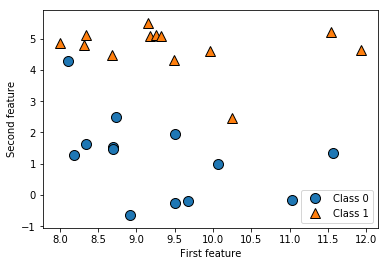

In [65]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))



La siguiente figura ilustra la clasificación que realiza Knn con un número de vecinos igual a 1, para tres instancias nuevas (las dibujadas con una estrella). 

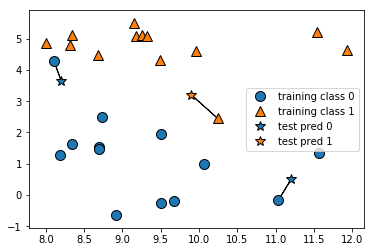

In [66]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Veamos la diferencia cuando usamos un número de vecinos igual a tres:

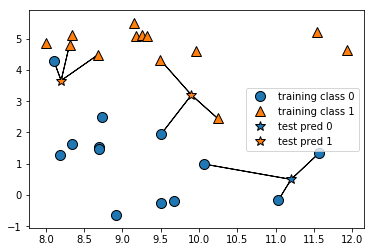

In [67]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Lo que sigue es la visualización de distintas fronteras de decisión  que el clasificador Knn crea, para respectivamente 1, 3 y 9 vecinos:

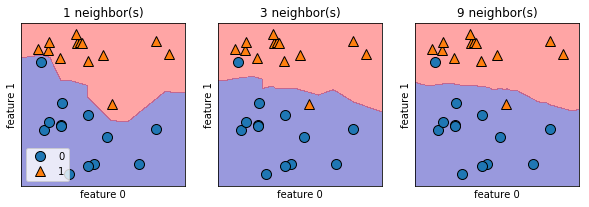

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Se puede observar que a medida que aumenta el número de vecinos considerado, el modelo se simplifica,con fronteras de decisión más simples. En el xaso extremo de que el número de vecinos sea el total de ejemplos entonces todos los vecinos serían casificados de la msma manera (la clase mayoritara)

Probemos ahora con los datos del cáncer de mama

In [76]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)


El siguiente código evalúa Knn sobre ese conjunto de datos, y mira el rendimiento sobre el conjunto de test, variando el número de vecinos de 1 a 10. Se presenta la gráfica de cómo evoluciona el rendimiento (tanto en entrenamiento como en test) en función del número de vecinos:

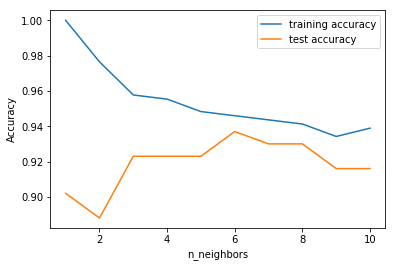

In [78]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Se observa que para $k=1$ la precisión sobre el conjunto de entrenamiento es perfecta, y muy mala para el test (existe sobreajuste, porque el modelo aprendido es más complejo y se ajusta demasiado al conjuto de entrenamiento). Igualmente, cuando el número de vecinos es grande ($k=10$), también se va perdiendo precisión porque se produce infraajuste, ya que el modelo es más simple, y no puede adaptarse.